<a href="https://colab.research.google.com/github/Gowthami-28/-LGMVIP-DataScience-task2/blob/main/EXPLORATORY_DATA_ANALYSIS_ON_DATASET_TERRORISM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**EXPLORATORY DATA ANALYSIS ON DATASET TERRORISM INTERMEDIATE LEVEL TASK-1**

**IMPORTING LIBRARIES**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data=pd.read_csv("/content/globalterrorismdb_0718dist.csv",encoding='latin1')
data

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1,0,NaN,NaN,1,1,1,-9,NaN,NaN,0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57845,199411260001,1994,11,26,NaN,0,NaN,101,Japan,4,East Asia,Kumamoto,Kumamoto,32.803100,130.707891,1,0,NaN,NaN,1,1,1,-9,NaN,NaN,0,1,0,2,Armed Assault,NaN,NaN,NaN,NaN,2,Government (General),18.0,"Government Personnel (excluding police, military)",NaN,Former Construction Minister Takeshi Noda,...,NaN,NaN,Molotov cocktail,0.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,0.0,-9.0,NaN
57846,199411260002,1994,11,26,NaN,0,NaN,69,France,8,Western Europe,Corsica,Bastia,42.699997,9.447317,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,9,Unknown,NaN,NaN,NaN,NaN,2,Government (General),21.0,Government Building/Facility/Office,NaN,Gov

In [ ]:
data.columns.values


array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [ ]:
data.rename(columns={'iyear':'Year','imonth':'Month','iday':"day",'gname':'Group','country_txt':'Country','region_txt':'Region','provstate':'State','city':'City','latitude':'latitude',
    'longitude':'longitude','summary':'summary','attacktype1_txt':'Attacktype','targtype1_txt':'Targettype','weaptype1_txt':'Weapon','nkill':'kill',
     'nwound':'Wound'},inplace=True)


In [ ]:
data = data[['Year','Month','day','Country','State','Region','City','latitude','longitude',"Attacktype",'kill',
               'Wound','target1','summary','Group','Targettype','Weapon','motive']]


In [ ]:
data.head()


,Year,Month,day,Country,State,Region,City,latitude,longitude,Attacktype,kill,Wound,target1,summary,Group,Targettype,Weapon,motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [ ]:
data.shape


(57850, 18)

In [ ]:
data.isnull().sum()


Year              0
Month             0
day               0
Country           0
State           300
Region            0
City              0
latitude       3103
longitude      3104
Attacktype        0
kill           5905
Wound          7767
target1         395
summary       56557
Group             1
Targettype        0
Weapon            1
motive        56838
dtype: int64

In [ ]:
data['Wound'] = data['Wound'].fillna(0)
data['kill'] = data['kill'].fillna(0)


In [ ]:
data['Casualities'] = data['kill'] + data['Wound']


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57850 entries, 0 to 57849
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         57850 non-null  int64  
 1   Month        57850 non-null  int64  
 2   day          57850 non-null  int64  
 3   Country      57850 non-null  object 
 4   State        57550 non-null  object 
 5   Region       57850 non-null  object 
 6   City         57850 non-null  object 
 7   latitude     54747 non-null  float64
 8   longitude    54746 non-null  float64
 9   Attacktype   57850 non-null  object 
 10  kill         57850 non-null  float64
 11  Wound        57850 non-null  float64
 12  target1      57455 non-null  object 
 13  summary      1293 non-null   object 
 14  Group        57849 non-null  object 
 15  Targettype   57850 non-null  object 
 16  Weapon       57849 non-null  object 
 17  motive       1012 non-null   object 
 18  Casualities  57850 non-null  float64
dtypes: f

In [ ]:
data.describe()


,Year,Month,day,latitude,longitude,kill,Wound,Casualities
count,57850.000000,57850.000000,57850.000000,54747.000000,5.474600e+04,57850.000000,57850.000000,57850.000000
mean,1985.340294,6.422109,15.369127,17.428076,-1.592463e+03,1.865445,1.516318,3.381763
std,5.734780,3.385078,8.805052,25.071175,3.683494e+05,9.254683,10.067451,14.815418
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1981.000000,4.000000,8.000000,4.667128,-7.651604e+01,0.000000,0.000000,0.000000
50%,1986.000000,6.000000,15.000000,14.622869,-5.956210e+00,0.000000,0.000000,0.000000
75%,1990.000000,9.000000,23.000000,38.552185,3.100829e+01,1.000000,0.000000,2.000000
max,1994.000000,12.000000,31.000000,64.837778,1.784419e+02,1180.000000,800.000000,1180.000000


In [ ]:
attack = data.Country.value_counts()[:10]
attack

Peru              5855
El Salvador       5302
Colombia          4852
United Kingdom    3891
Spain             2570
India             2269
Chile             2235
United States     2130
Turkey            2108
Nicaragua         1912
Name: Country, dtype: int64

In [ ]:
data.Group.value_counts()[1:10]


Shining Path (SL)                                   4396
Farabundo Marti National Liberation Front (FMLN)    3351
Irish Republican Army (IRA)                         2604
Basque Fatherland and Freedom (ETA)                 1652
Palestinians                                        1079
New People's Army (NPA)                              964
Nicaraguan Democratic Force (FDN)                    895
Revolutionary Armed Forces of Colombia (FARC)        882
National Liberation Army of Colombia (ELN)           877
Name: Group, dtype: int64

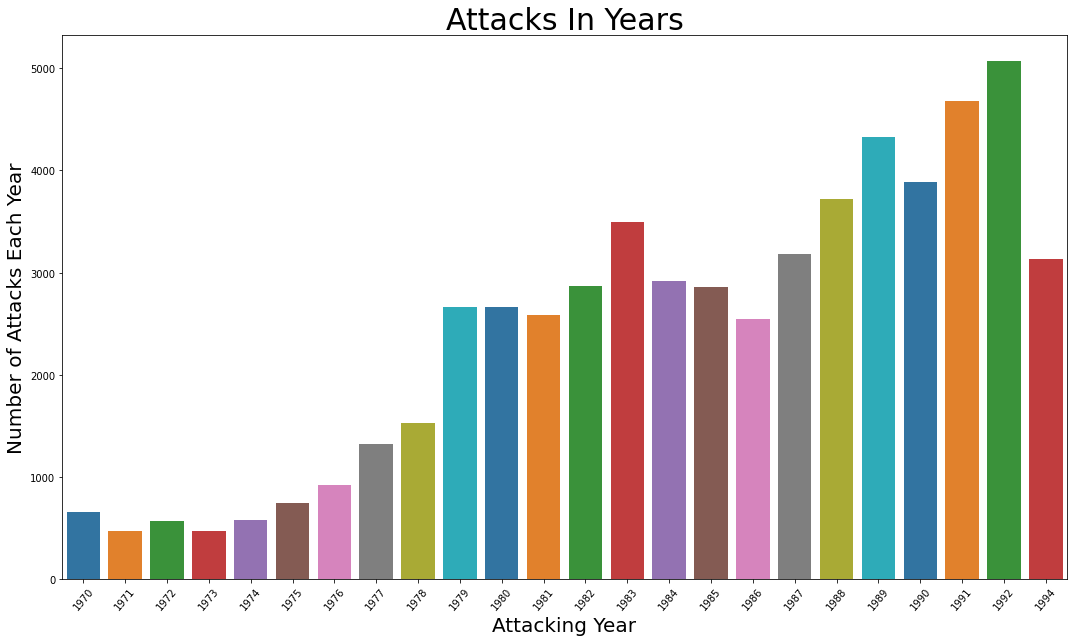

In [ ]:
year = data['Year'].unique()
years_count = data['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (18,10))
sns.barplot(x = year,
           y = years_count,
           palette = "tab10")
plt.xticks(rotation = 50)
plt.xlabel('Attacking Year',fontsize=20)
plt.ylabel('Number of Attacks Each Year',fontsize=20)
plt.title('Attacks In Years',fontsize=30)
plt.show()


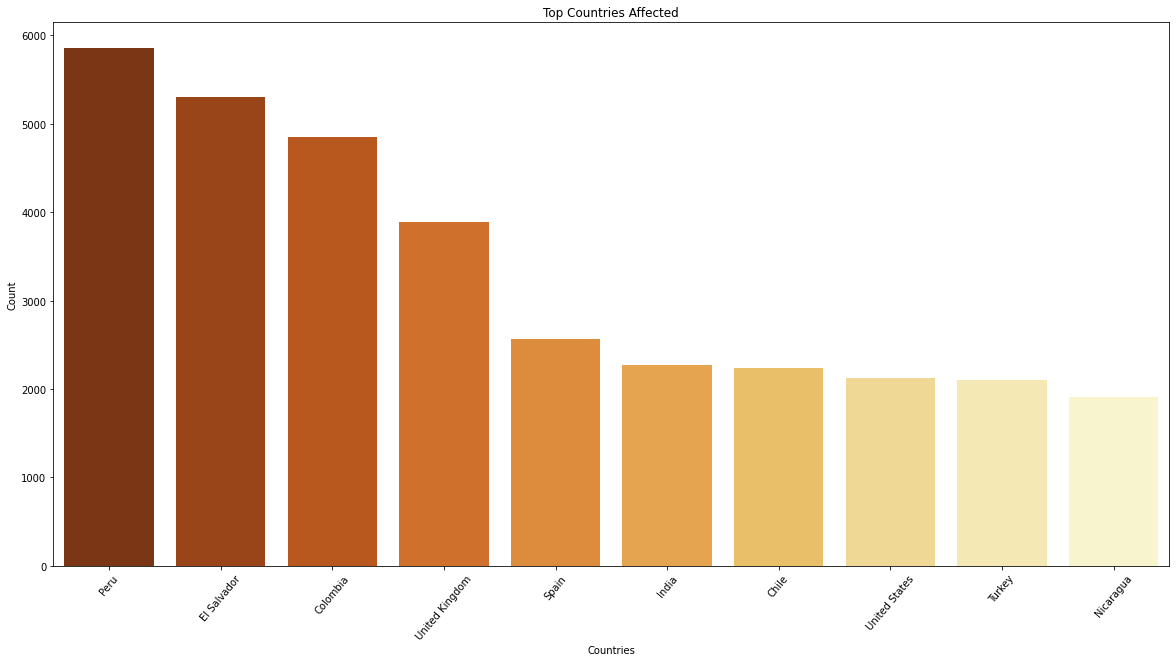

In [ ]:
plt.subplots(figsize=(20,10))
sns.barplot(data['Country'].value_counts()[:10].index,data['Country'].value_counts()[:10].values,palette='YlOrBr_r')
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation = 50)
plt.show()

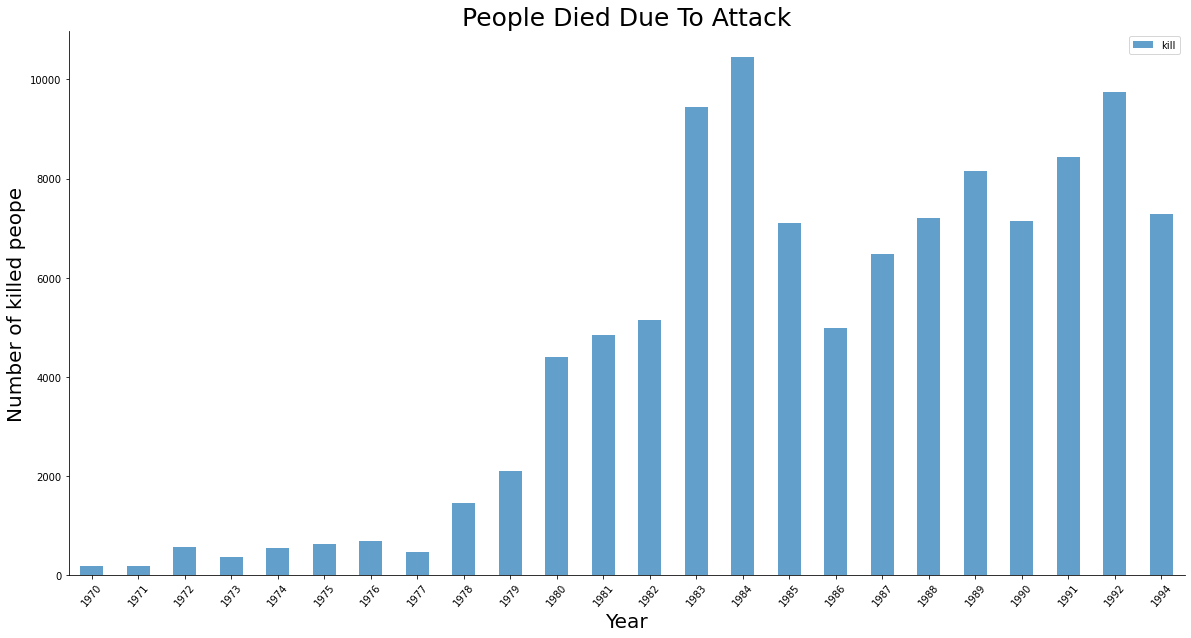

In [ ]:
df = data[['Year','kill']].groupby(['Year']).sum()
fig, ax4 = plt.subplots(figsize=(20,10))
df.plot(kind='bar',alpha=0.7,ax=ax4)
plt.xticks(rotation = 50)
plt.title("People Died Due To Attack",fontsize=25)
plt.ylabel("Number of killed peope",fontsize=20)
plt.xlabel('Year',fontsize=20)
top_side = ax4.spines["top"]
top_side.set_visible(False)
right_side = ax4.spines["right"]
right_side.set_visible(False)

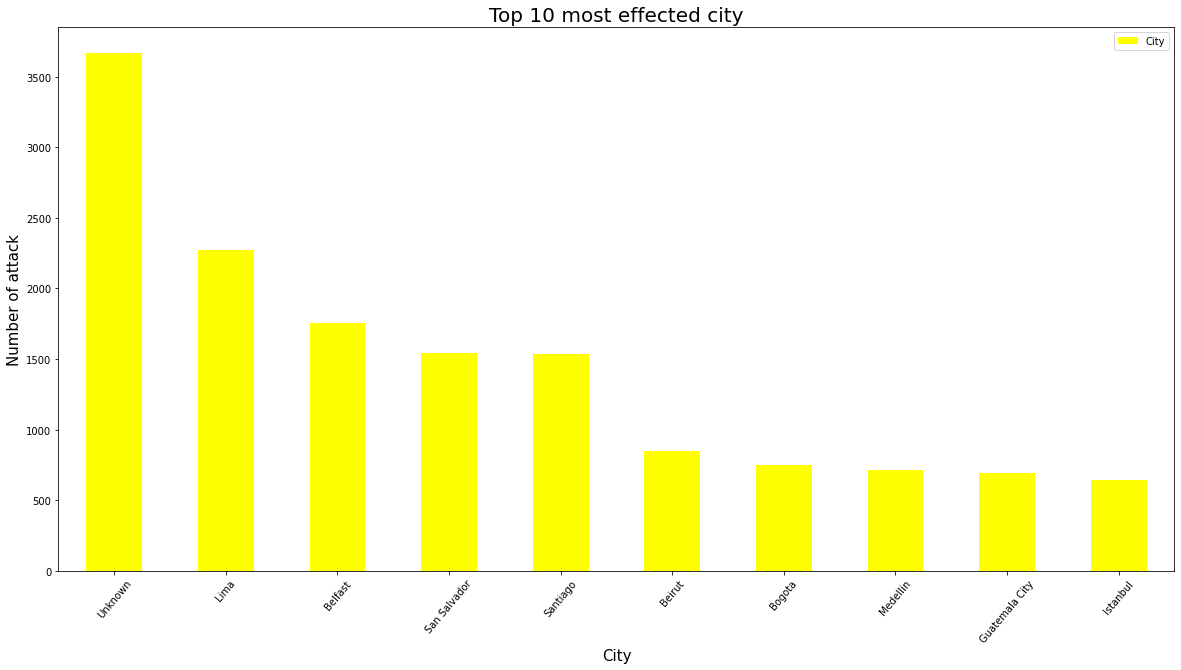

In [ ]:
data['City'].value_counts().to_frame().sort_values('City',axis=0,ascending=False).head(10).plot(kind='bar',figsize=(20,10),color='yellow')
plt.xticks(rotation = 50)
plt.xlabel("City",fontsize=15)
plt.ylabel("Number of attack",fontsize=15)
plt.title("Top 10 most effected city",fontsize=20)
plt.show()

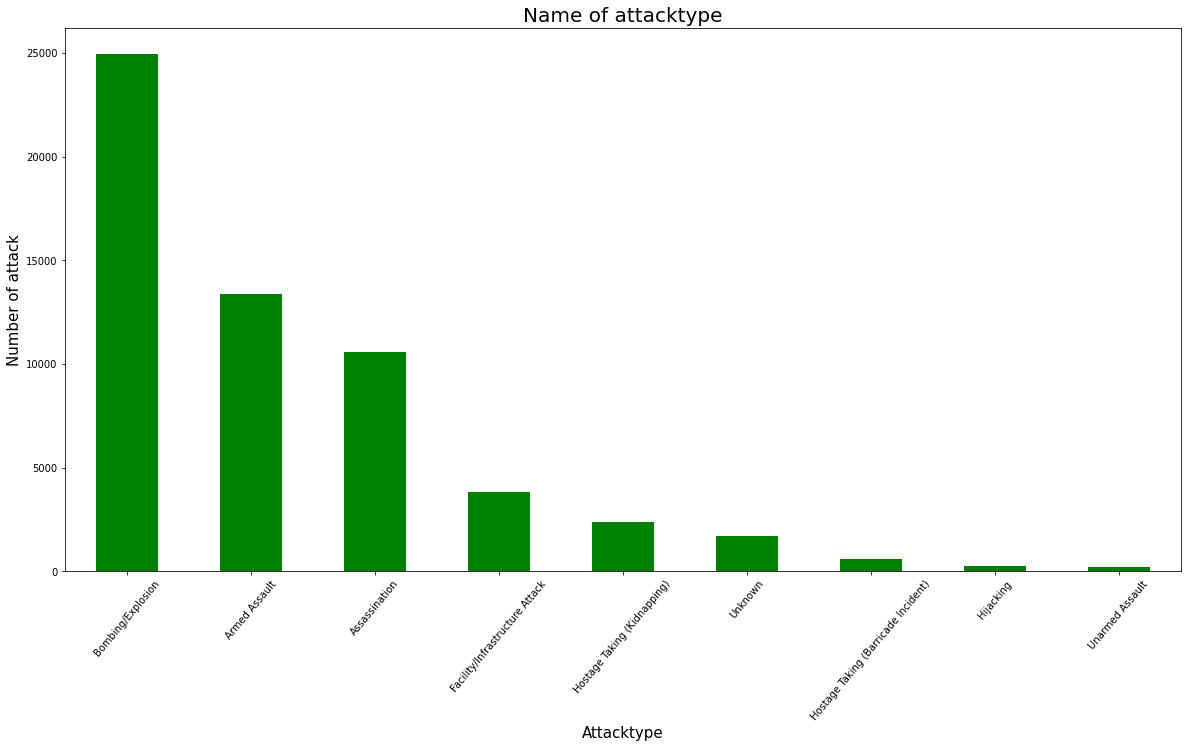

In [ ]:
data['Attacktype'].value_counts().plot(kind='bar',figsize=(20,10),color='green')
plt.xticks(rotation = 50)
plt.xlabel("Attacktype",fontsize=15)
plt.ylabel("Number of attack",fontsize=15)
plt.title("Name of attacktype",fontsize=20)
plt.show()

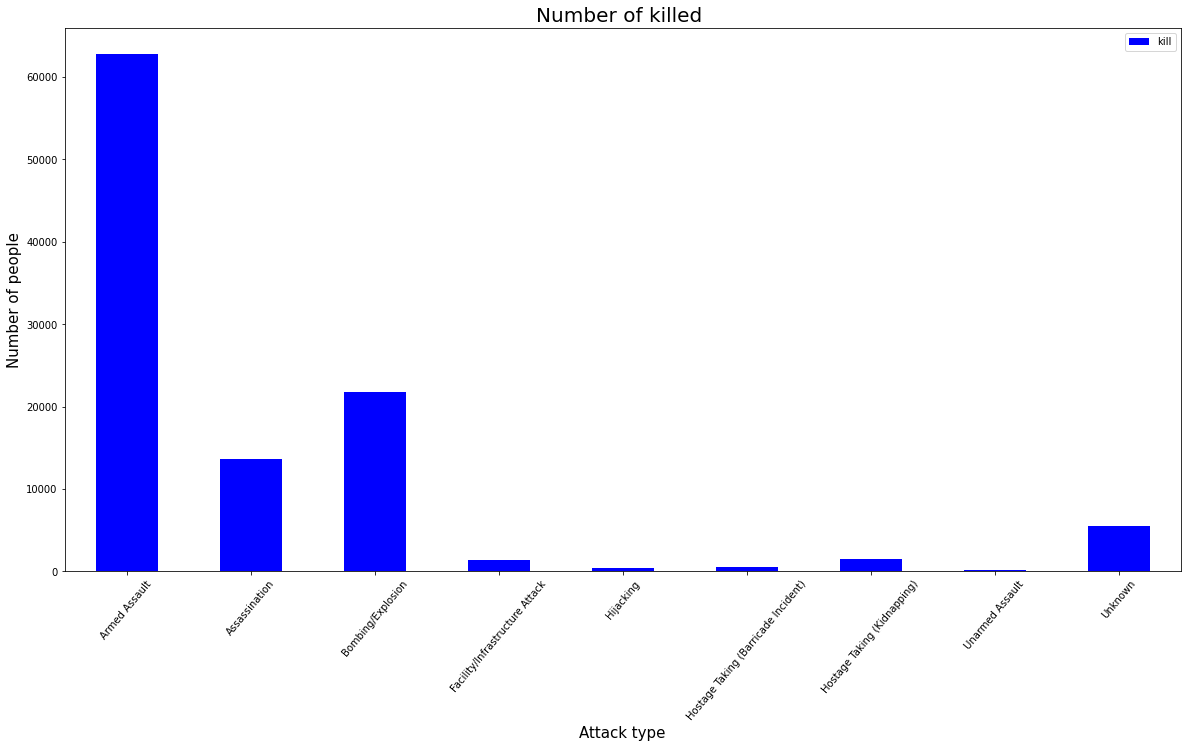

In [ ]:
data[['Attacktype','kill']].groupby(["Attacktype"],axis=0).sum().plot(kind='bar',figsize=(20,10),color=['Blue'])
plt.xticks(rotation=50)
plt.title("Number of killed ",fontsize=20)
plt.ylabel('Number of people',fontsize=15)
plt.xlabel('Attack type',fontsize=15)
plt.show()

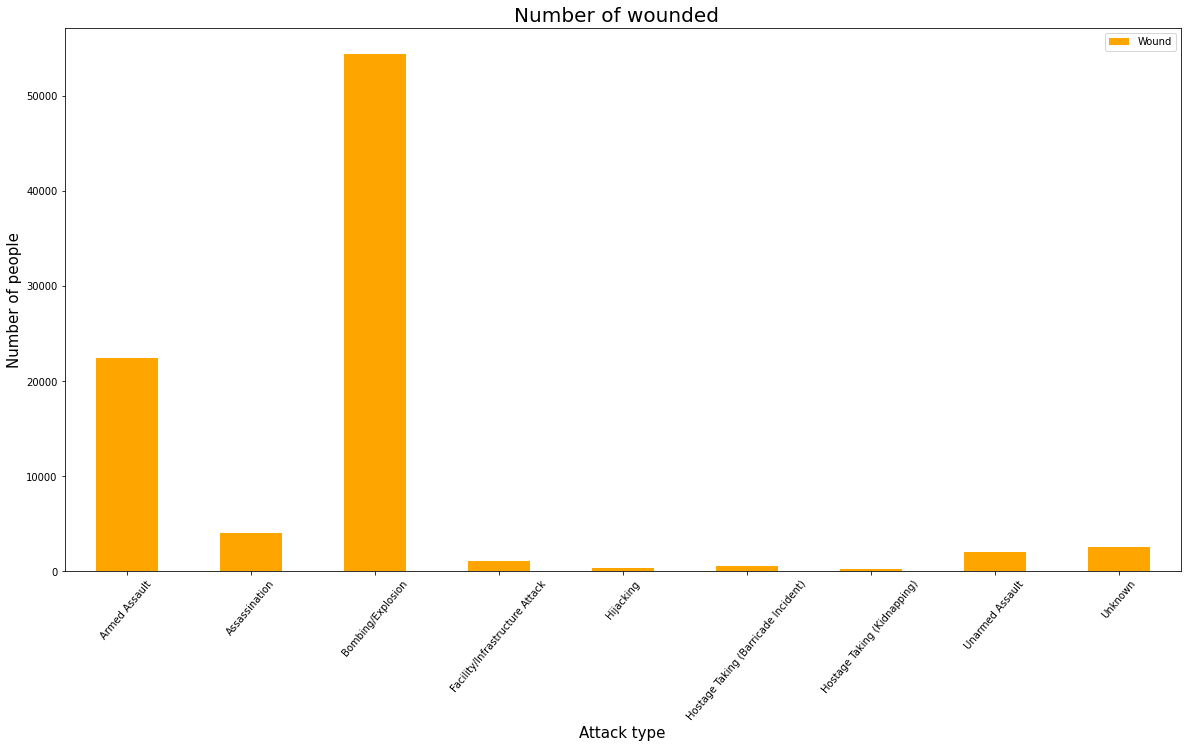

In [ ]:
data[['Attacktype','Wound']].groupby(["Attacktype"],axis=0).sum().plot(kind='bar',figsize=(20,10),color=['orange'])
plt.xticks(rotation=50)
plt.title("Number of wounded  ",fontsize=20)
plt.ylabel('Number of people',fontsize=15)
plt.xlabel('Attack type',fontsize=15)
plt.show()

In [ ]:
df=data[['Group','Country','kill']]
df=df.groupby(['Group','Country'],axis=0).sum().sort_values('kill',ascending=False).drop('Unknown').reset_index().head(10)
df

,Group,Country,kill
0,Shining Path (SL),Peru,11242.0
1,Farabundo Marti National Liberation Front (FMLN),El Salvador,8019.0
2,Nicaraguan Democratic Force (FDN),Nicaragua,6630.0
3,Liberation Tigers of Tamil Eelam (LTTE),Sri Lanka,5654.0
4,New People's Army (NPA),Philippines,3002.0
5,Kurdistan Workers' Party (PKK),Turkey,2962.0
6,Revolutionary Armed Forces of Colombia (FARC),Colombia,2616.0
7,Sikh Extremists,India,2476.0
8,Mozambique National Resistance Movement (MNR),Mozambique,2357.0
9,Democratic Revolutionary Alliance (ARDE),Nicaragua,1803.0


In [ ]:
typeKill = data.pivot_table(columns='Attacktype', values='kill', aggfunc='sum')
typeKill

Attacktype,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
kill,62838.0,13669.0,21782.0,1345.0,445.0,572.0,1556.0,179.0,5530.0


In [ ]:
countryKill = data.pivot_table(columns='Country', values='kill', aggfunc='sum')
countryKill

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bolivia,Bosnia-Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burundi,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Costa Rica,Croatia,Cuba,Cyprus,...,South Africa,South Korea,South Vietnam,South Yemen,Soviet Union,Spain,Sri Lanka,Sudan,Suriname,Swaziland,Sweden,Switzerland,Syria,Taiwan,Tajikistan,Tanzania,Thailand,Togo,Trinidad and Tobago,Tunisia,Turkey,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Vatican City,Venezuela,Vietnam,Wallis and Futuna,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yemen,Yugoslavia,Zaire,Zambia,Zimbabwe
kill,342.0,2.0,760.0,0.0,1269.0,0.0,486.0,17.0,11.0,21.0,242.0,0.0,1.0,577.0,76.0,0.0,32.0,3.0,0.0,38.0,58.0,11.0,120.0,0.0,3.0,2.0,429.0,318.0,75.0,349.0,9.0,211.0,220.0,46.0,8555.0,1.0,13.0,242.0,6.0,42.0,...,2354.0,10.0,81.0,0.0,96.0,974.0,9487.0,452.0,29.0,5.0,11.0,58.0,505.0,49.0,59.0,2.0,323.0,73.0,2.0,46.0,3939.0,799.0,5.0,122.0,3166.0,252.0,5.0,0.0,0.0,175.0,0.0,0.0,481.0,97.0,1.0,35.0,15.0,45.0,69.0,136.0
